In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


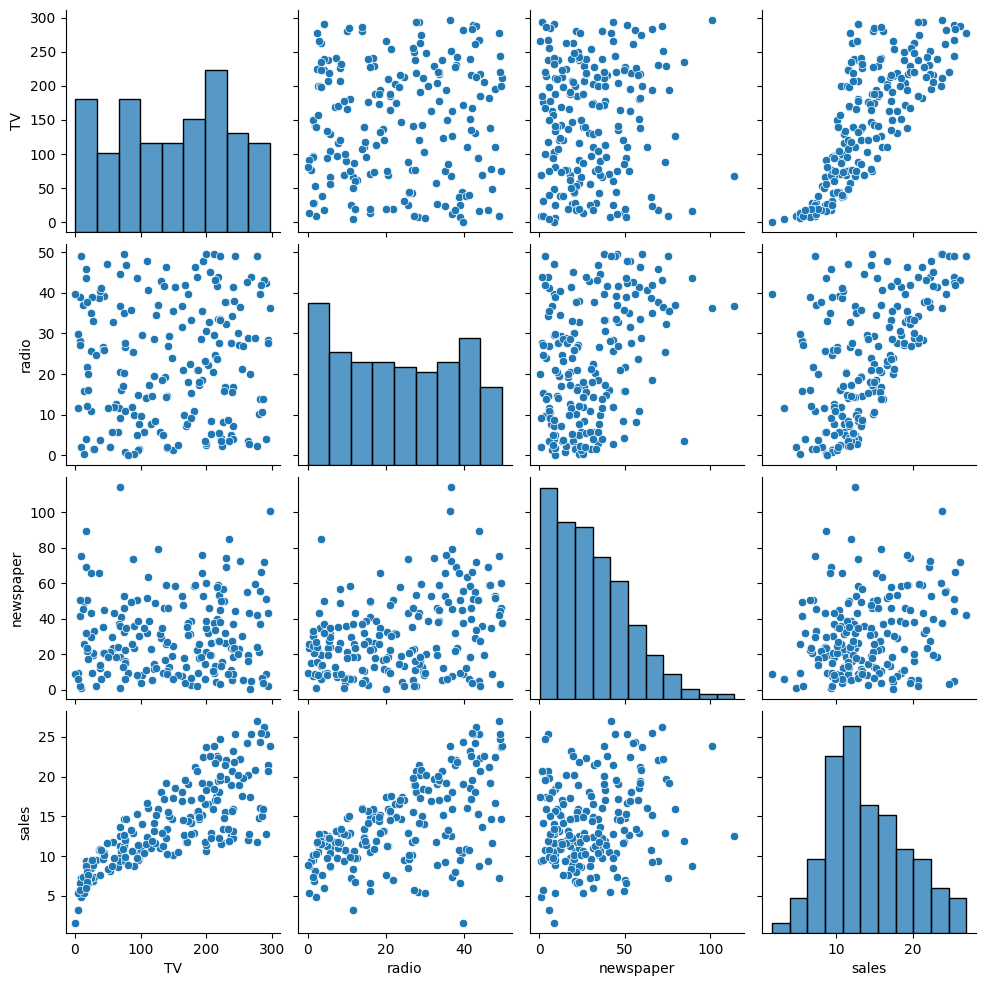

In [4]:
sns.pairplot(df)

Text(0.5, 1.0, 'Newspaper')

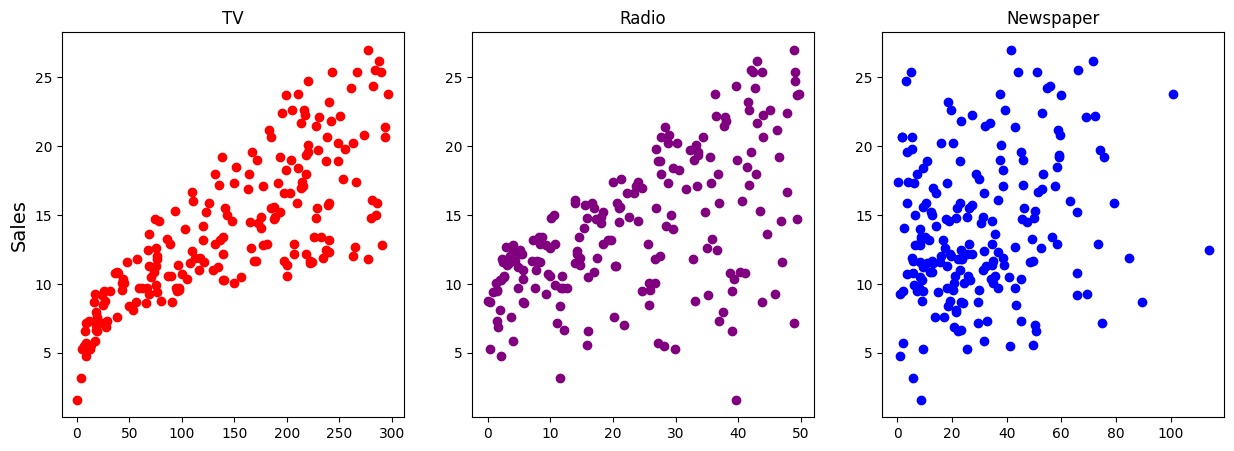

In [9]:
fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"],df["sales"],"o",color="red")
ax[0].set_ylabel("Sales",size= 14)
ax[0].set_title("TV")

ax[1].plot(df["radio"],df["sales"],"o",color="purple")
ax[1].set_title("Radio")

ax[2].plot(df["newspaper"],df["sales"],"o",color="blue")
ax[2].set_title("Newspaper")



## np.polyFit()

In [12]:
df.shape

(200, 4)

In [10]:
X = df["TV"]
y = df["sales"]

In [11]:
expenses = np.linspace(0,300,100)

## 1. Degree

In [14]:
np.polyfit(X,y,1)

array([0.04753664, 7.03259355])

In [15]:
sell = 0.04753664*expenses + 7.03259355

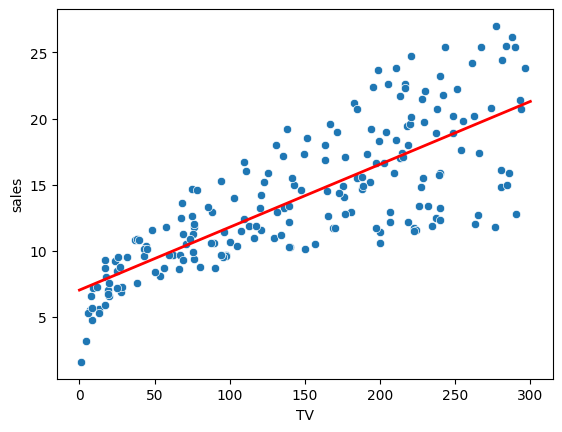

In [17]:
sns.scatterplot(data=df,x="TV",y = "sales")
plt.plot(expenses,sell,c="red",lw=2)

## 2. Degree

In [19]:
a,b,c = np.polyfit(X,y,2)

#### it is ax^2+bx+c

In [22]:
sell = a*(expenses**2)+b*expenses+c

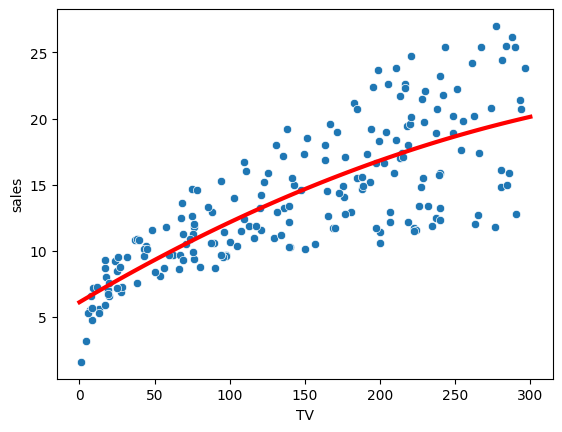

In [24]:
sns.scatterplot(data=df,x="TV",y = "sales")
plt.plot(expenses,sell,c="red",lw=3)

In [27]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [34]:
np.polyfit(X,y,3)

TypeError: expected 1D vector for x

#### Train_test_split

In [31]:
X = df.drop("sales",axis=1)
y = df["sales"]

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state= 42)

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model_linear = LinearRegression()

In [37]:
model_linear.fit(X_train,y_train)

LinearRegression()

In [38]:
pred_lin = model_linear.predict(X_test)

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [40]:
MAE = mean_absolute_error(y_test, pred_lin)
RMSE = np.sqrt(mean_squared_error(y_test, pred_lin))

In [41]:
print("MAE : ", MAE)
print("RMSE :", RMSE)

MAE :  1.5116692224549089
RMSE : 1.9485372043446394


In [42]:
res_lin = y_test - pred_lin

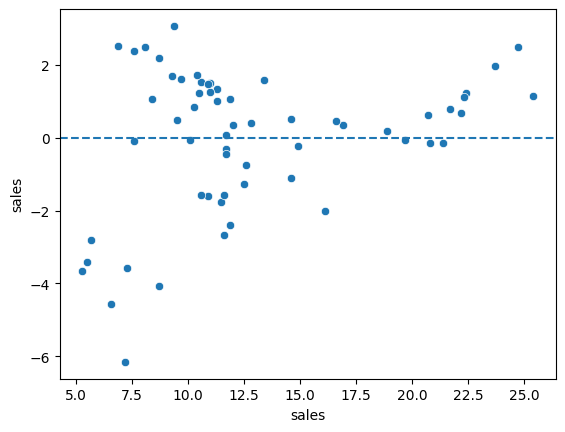

In [43]:
sns.scatterplot(x= y_test, y= res_lin)
plt.axhline(y= 0, ls= "--")

<Axes: xlabel='sales', ylabel='Count'>

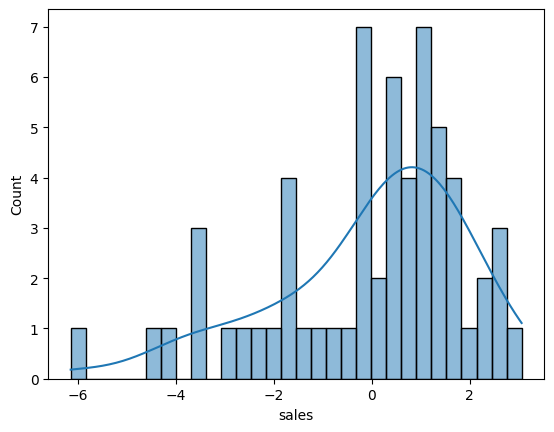

In [44]:
sns.histplot(res_lin, bins=30, kde=True)

#### Final Linear Model

In [45]:
final_lin = LinearRegression()

In [46]:
final_lin.fit(X,y)

LinearRegression()

In [47]:
y_hat = final_lin.predict(X)

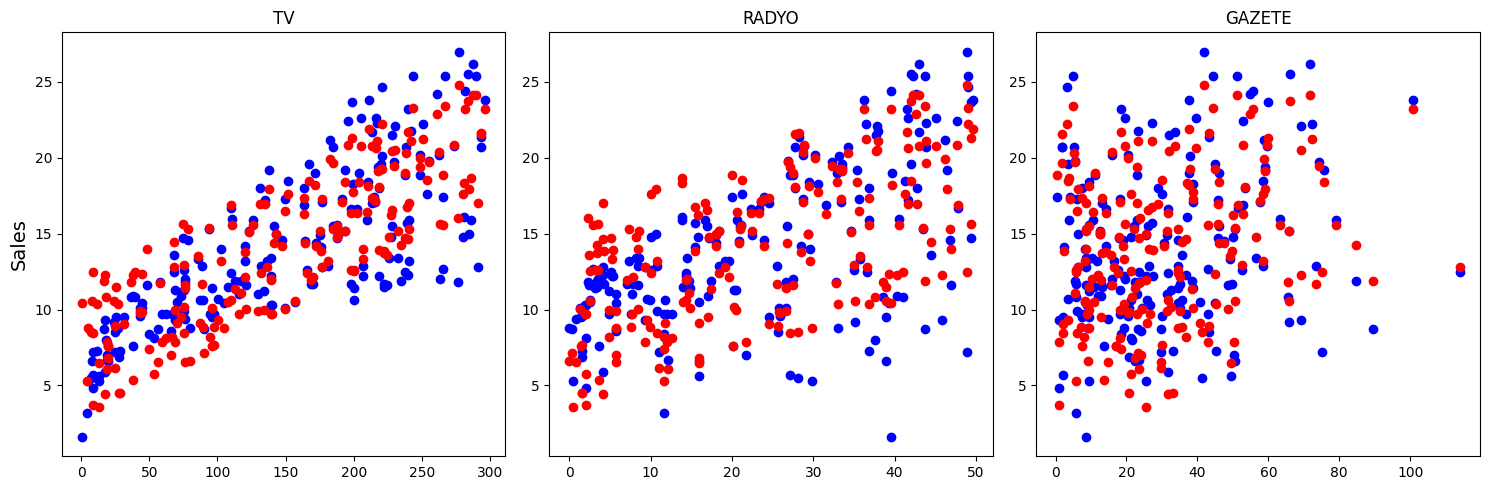

In [48]:
fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].plot(df["TV"], df["sales"], "o", color="blue")
ax[0].plot(df["TV"], y_hat, "o", color="red")
ax[0].set_ylabel("Sales", size=14)
ax[0].set_title("TV")

ax[1].plot(df["radio"], df["sales"], "o", color="blue")
ax[1].plot(df["radio"], y_hat, "o", color="red")
ax[1].set_title("RADYO")

ax[2].plot(df["newspaper"], df["sales"], "o", color="blue")
ax[2].plot(df["newspaper"], y_hat, "o", color="red")
ax[2].set_title("GAZETE")

plt.tight_layout()

#### Poly Fit

In [49]:
from sklearn.preprocessing import PolynomialFeatures

In [50]:
poly_conv = PolynomialFeatures(degree=2, include_bias=False)

In [51]:
poly_feat = poly_conv.fit_transform(X)

In [52]:
poly_feat

array([[ 230.1 ,   37.8 ,   69.2 , ..., 1428.84, 2615.76, 4788.64],
       [  44.5 ,   39.3 ,   45.1 , ..., 1544.49, 1772.43, 2034.01],
       [  17.2 ,   45.9 ,   69.3 , ..., 2106.81, 3180.87, 4802.49],
       ...,
       [ 177.  ,    9.3 ,    6.4 , ...,   86.49,   59.52,   40.96],
       [ 283.6 ,   42.  ,   66.2 , ..., 1764.  , 2780.4 , 4382.44],
       [ 232.1 ,    8.6 ,    8.7 , ...,   73.96,   74.82,   75.69]])

In [53]:
X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)

In [54]:
model_poly = LinearRegression(fit_intercept=True)

In [56]:
model_poly.fit(X_train, y_train)

LinearRegression()

In [57]:
pred_poly = model_poly.predict(X_test)

In [62]:
MAE_2 = mean_absolute_error(y_test, pred_poly)
RMSE_2 = np.sqrt(mean_squared_error(y_test, pred_poly))
R2_score = r2_score(y_test,pred_poly)

In [63]:
print("MAE  : ", MAE_2)
print("RMSE :", RMSE_2)
print("R2   :",R2_score)

MAE  :  0.4678054953837911
RMSE : 0.6106500340084697
R2   : 0.9854852727114002


## Best Regr Degree For Poly

In [68]:
train_rmse = []
test_rmse = []

for d in range(1,10):
    
    poly_conv = PolynomialFeatures(degree=d, include_bias=False)
    poly_feat = poly_conv.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_feat, y, test_size=0.3, random_state=99)
    
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train,y_train)
    
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE = np.sqrt(mean_squared_error(y_train,train_pred))
    
    test_RMSE = np.sqrt(mean_squared_error(y_test,test_pred))

    train_rmse.append(train_RMSE)
    test_rmse.append(test_RMSE)

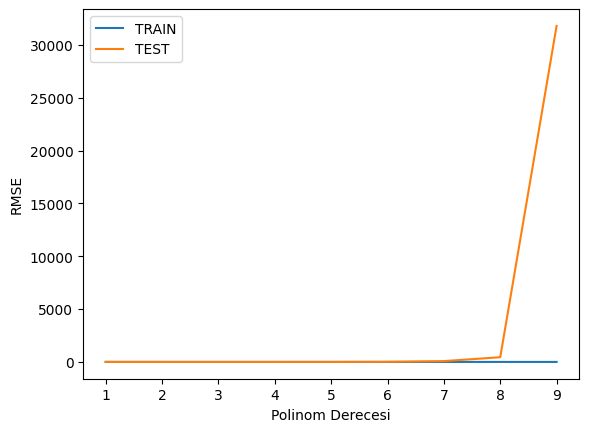

In [69]:
plt.plot(range(1,10),train_rmse[:9],label='TRAIN')
plt.plot(range(1,10),test_rmse[:9],label='TEST')
plt.xlabel("Polinom Derecesi")
plt.ylabel("RMSE")
plt.legend()

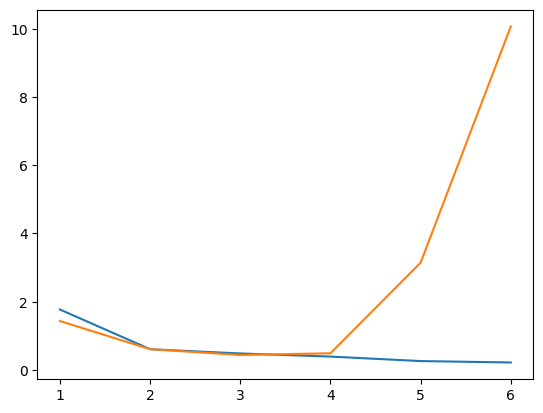

In [71]:
plt.plot(range(1,7),train_rmse[:6],label='TRAIN')
plt.plot(range(1,7),test_rmse[:6],label='TEST')

##### It has a huge change in the degree of 4

In [72]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [99]:
X = df.drop("sales", axis=1)
y = df["sales"]

In [79]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_2 = LinearRegression()
poly_regr_2.fit(X_poly, y)

LinearRegression()

In [80]:
poly_pred_2 = poly_regr_2.predict(X_poly)

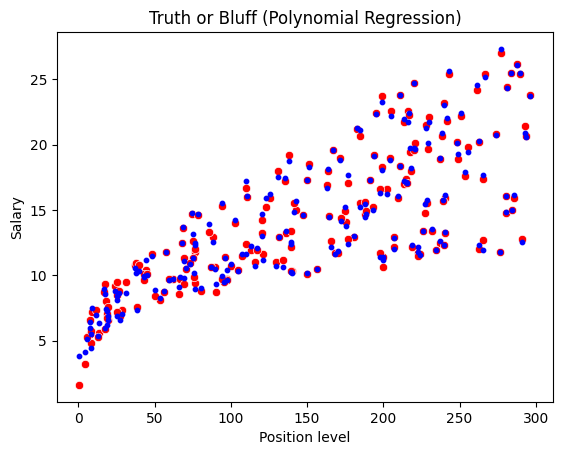

In [91]:
sns.scatterplot(x="TV", y="sales", color = 'red',data=df)
plt.scatter(X["TV"],poly_pred_2, color = 'blue', s=10)
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

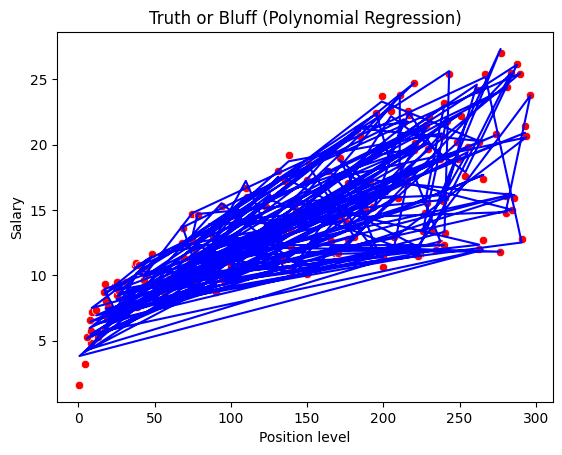

In [98]:
sns.scatterplot(x="TV", y="sales", color = 'red',data=df)
plt.plot(X["TV"],poly_pred_2, color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Regr Visualization

In [108]:
X = df[["TV"]] # iki köşeli parntez olmadan da çalıştır
y = df["sales"]

In [109]:
X.shape

(200, 1)

In [110]:
y.shape

(200,)

In [111]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

In [107]:
poly_reg = PolynomialFeatures(degree = 10)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
poly_regr_3 = LinearRegression()
poly_regr_3.fit(X_poly, y)

LinearRegression()

In [106]:
poly_pred_3 = poly_regr_3.predict(X_poly)

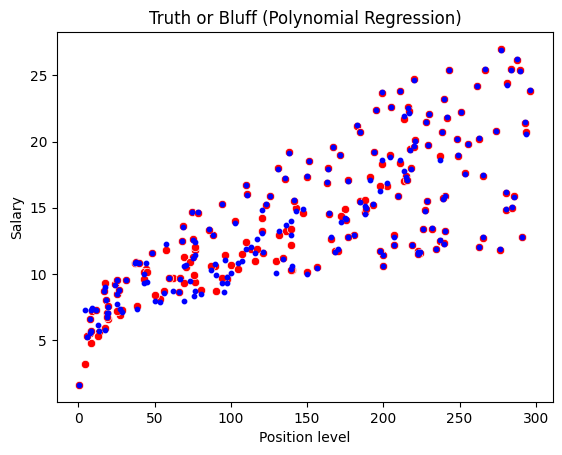

In [113]:
sns.scatterplot(x= "TV", y="sales", color = 'red',data=df) # ["TV"] olmadan çalıştır
plt.scatter(X ,poly_pred_3, color = 'blue', s=10)
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()